# Titanic
## Descriptive Analysis

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

print(df_train.shape)
print(df_train.columns)
print(df_train.dtypes)
print(df_train.head())

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs.

In [2]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


Trop de NA pour la variable ***Cabin***, on l'exclut pour l'instant

In [5]:
df_train2 = df_train.drop('Cabin', axis=1)
df_test2 = df_test.drop('Cabin', axis=1)

In [6]:
quanti = ['Age', 'SibSp', 'Parch', 'Fare']
df_train2[quanti].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


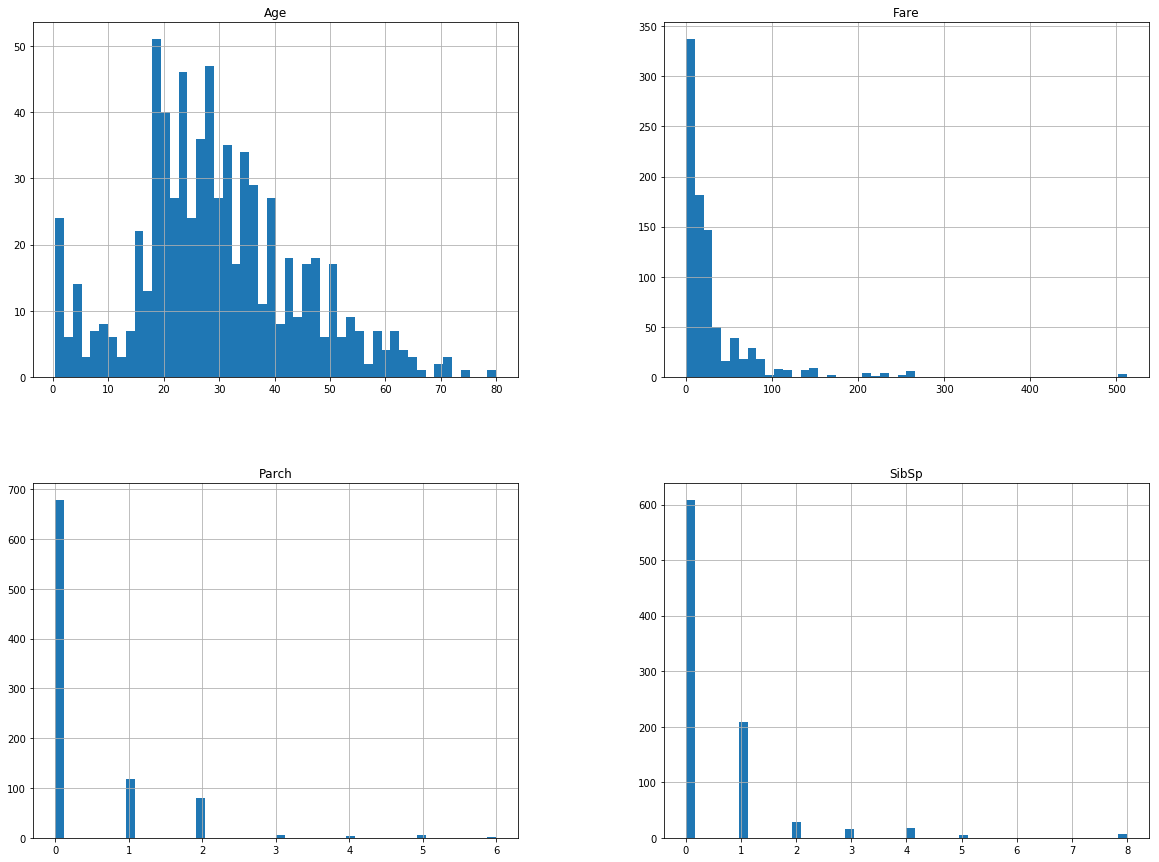

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train2[quanti].hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
X = df_train2.drop('Survived',axis=1)
Y = df_train2['Survived']

In [10]:
print(X.columns)
print(X.dtypes)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


**Imputing NA**

In [11]:
from sklearn.impute import SimpleImputer
X[['Age']] = SimpleImputer(np.nan,strategy = 'mean').fit_transform(X[['Age']])

X[['Embarked']] = SimpleImputer(np.nan,strategy = 'most_frequent').fit_transform(X[['Embarked']])

In [12]:
X['Embarked'].isna().sum()

0

In [13]:
X['Embarked'].dropna(axis=0,inplace=True, how ='any')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(X['Sex'])
X['Sex_enc'] = encoder.transform(X['Sex'])

encoder.fit(X['Embarked'])
X['Embark_enc']= encoder.transform(X['Embarked'])

In [14]:
X['Embarked'].isna().sum()

0

In [15]:
print(X['Embarked'].value_counts())
print(X['Sex'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Logistic Regression

In [17]:
features_select = ['Pclass','Sex_enc','Age','SibSp','Parch','Fare','Embark_enc']
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, penalty='l2', solver='lbfgs',multi_class='ovr',max_iter=1000).fit(X_train[features_select],Y_train)
Y_pred = clf.predict(X_test[features_select])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8169491525423729

## RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid2 = [{'n_estimators':[10,20,50,100], 'criterion':['gini','entropy'], 
               'oob_score':[True, False]}]
clf2 = RandomForestClassifier(n_jobs=-1, random_state=42)
grid_search2 = GridSearchCV(clf2, param_grid2, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm
grid_search2.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, oob_score=True, n_estimators=10 .................
[CV]  criterion=gini, oob_score=True, n_estimators=10, score=0.8083333333333333, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=10 .................
[CV]  criterion=gini, oob_score=True, n_estimators=10, score=0.75, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=10 .................
[CV]  criterion=gini, oob_score=True, n_estimators=10, score=0.7899159663865546, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=10 .................
[CV]  criterion=gini, oob_score=True, n_estimators=10, score=0.7815126050420168, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=10 .................
[CV]  criterion=gini, oob_score=True, n_estimators=10, score=0.8389830508474576, total=   0.0s
[CV] criterion=gini, oob_score=False, n_estimators=10 ................
[CV]  criterion=gini, oob_score=False, n_estimators=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)


[CV] criterion=gini, oob_score=False, n_estimators=10 ................
[CV]  criterion=gini, oob_score=False, n_estimators=10, score=0.8389830508474576, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=20 .................
[CV]  criterion=gini, oob_score=True, n_estimators=20, score=0.7833333333333333, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=20 .................
[CV]  criterion=gini, oob_score=True, n_estimators=20, score=0.75, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=20 .................
[CV]  criterion=gini, oob_score=True, n_estimators=20, score=0.8067226890756303, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=20 .................
[CV]  criterion=gini, oob_score=True, n_estimators=20, score=0.7983193277310925, total=   0.0s
[CV] criterion=gini, oob_score=True, n_estimators=20 .................
[CV]  criterion=gini, oob_score=True, n_estimators=20, score=0.8220338983050848, total=   0.0s
[CV] criterion=g

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t


[CV] criterion=entropy, oob_score=True, n_estimators=20 ..............
[CV]  criterion=entropy, oob_score=True, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=entropy, oob_score=True, n_estimators=20 ..............
[CV]  criterion=entropy, oob_score=True, n_estimators=20, score=0.775, total=   0.0s
[CV] criterion=entropy, oob_score=True, n_estimators=20 ..............
[CV]  criterion=entropy, oob_score=True, n_estimators=20, score=0.7815126050420168, total=   0.0s
[CV] criterion=entropy, oob_score=True, n_estimators=20 ..............
[CV]  criterion=entropy, oob_score=True, n_estimators=20, score=0.7899159663865546, total=   0.0s
[CV] criterion=entropy, oob_score=True, n_estimators=20 ..............
[CV]  criterion=entropy, oob_score=True, n_estimators=20, score=0.8389830508474576, total=   0.0s
[CV] criterion=entropy, oob_score=False, n_estimators=20 .............
[CV]  criterion=entropy, oob_score=False, n_estimators=20, score=0.8, total=   0.0s
[CV] criterion=entropy, oob

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'oob_score': [True, False], 'n_estimators': [10, 20, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [20]:
grid_search2.best_params_

{'criterion': 'entropy', 'n_estimators': 20, 'oob_score': True}

In [21]:
grid_search2.best_score_

0.7969798657718121

In [22]:
Y_pred2 = grid_search2.predict(X_test[features_select])
accuracy_score(Y_test, Y_pred2)

0.8

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
param_grid3 = [{'n_neighbors':range(25,40), 'weights':['uniform','distance'], 'p':[1,2]}]
clf3 = KNeighborsClassifier(algorithm='auto',n_jobs=-1)
grid_search3 = GridSearchCV(clf3, param_grid3, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm
grid_search3.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] p=1, n_neighbors=25, weights=uniform ............................
[CV]  p=1, n_neighbors=25, weights=uniform, score=0.725, total=   0.0s
[CV] p=1, n_neighbors=25, weights=uniform ............................
[CV]  p=1, n_neighbors=25, weights=uniform, score=0.725, total=   0.0s
[CV] p=1, n_neighbors=25, weights=uniform ............................
[CV]  p=1, n_neighbors=25, weights=uniform, score=0.6554621848739496, total=   0.0s
[CV] p=1, n_neighbors=25, weights=uniform ............................
[CV]  p=1, n_neighbors=25, weights=uniform, score=0.6974789915966386, total=   0.0s
[CV] p=1, n_neighbors=25, weights=uniform ............................
[CV]  p=1, n_neighbors=25, weights=uniform, score=0.7288135593220338, total=   0.0s
[CV] p=1, n_neighbors=25, weights=distance ...........................
[CV]  p=1, n_neighbors=25, weights=distance, score=0.7583333333333333, total=   0.0s
[CV] p=1, n_neighbors=25, weights

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  p=2, n_neighbors=25, weights=distance, score=0.6833333333333333, total=   0.0s
[CV] p=2, n_neighbors=25, weights=distance ...........................
[CV]  p=2, n_neighbors=25, weights=distance, score=0.6218487394957983, total=   0.0s
[CV] p=2, n_neighbors=25, weights=distance ...........................
[CV]  p=2, n_neighbors=25, weights=distance, score=0.7310924369747899, total=   0.0s
[CV] p=2, n_neighbors=25, weights=distance ...........................
[CV]  p=2, n_neighbors=25, weights=distance, score=0.7372881355932204, total=   0.0s
[CV] p=1, n_neighbors=26, weights=uniform ............................
[CV]  p=1, n_neighbors=26, weights=uniform, score=0.7416666666666667, total=   0.0s
[CV] p=1, n_neighbors=26, weights=uniform ............................
[CV]  p=1, n_neighbors=26, weights=uniform, score=0.725, total=   0.0s
[CV] p=1, n_neighbors=26, weights=uniform ............................
[CV]  p=1, n_neighbors=26, weights=uniform, score=0.6386554621848739, total=   

[CV]  p=1, n_neighbors=29, weights=uniform, score=0.7058823529411765, total=   0.0s
[CV] p=1, n_neighbors=29, weights=uniform ............................
[CV]  p=1, n_neighbors=29, weights=uniform, score=0.7288135593220338, total=   0.0s
[CV] p=1, n_neighbors=29, weights=distance ...........................
[CV]  p=1, n_neighbors=29, weights=distance, score=0.7666666666666667, total=   0.0s
[CV] p=1, n_neighbors=29, weights=distance ...........................
[CV]  p=1, n_neighbors=29, weights=distance, score=0.7416666666666667, total=   0.0s
[CV] p=1, n_neighbors=29, weights=distance ...........................
[CV]  p=1, n_neighbors=29, weights=distance, score=0.6638655462184874, total=   0.0s
[CV] p=1, n_neighbors=29, weights=distance ...........................
[CV]  p=1, n_neighbors=29, weights=distance, score=0.7394957983193278, total=   0.0s
[CV] p=1, n_neighbors=29, weights=distance ...........................
[CV]  p=1, n_neighbors=29, weights=distance, score=0.7627118644067

[CV] .. p=1, n_neighbors=32, weights=uniform, score=0.7, total=   0.0s
[CV] p=1, n_neighbors=32, weights=uniform ............................
[CV]  p=1, n_neighbors=32, weights=uniform, score=0.6470588235294118, total=   0.0s
[CV] p=1, n_neighbors=32, weights=uniform ............................
[CV]  p=1, n_neighbors=32, weights=uniform, score=0.6554621848739496, total=   0.0s
[CV] p=1, n_neighbors=32, weights=uniform ............................
[CV]  p=1, n_neighbors=32, weights=uniform, score=0.7288135593220338, total=   0.0s
[CV] p=1, n_neighbors=32, weights=distance ...........................
[CV]  p=1, n_neighbors=32, weights=distance, score=0.7833333333333333, total=   0.0s
[CV] p=1, n_neighbors=32, weights=distance ...........................
[CV]  p=1, n_neighbors=32, weights=distance, score=0.7166666666666667, total=   0.0s
[CV] p=1, n_neighbors=32, weights=distance ...........................
[CV]  p=1, n_neighbors=32, weights=distance, score=0.6638655462184874, total=   0

[CV] p=2, n_neighbors=34, weights=distance ...........................
[CV]  p=2, n_neighbors=34, weights=distance, score=0.75, total=   0.0s
[CV] p=2, n_neighbors=34, weights=distance ...........................
[CV]  p=2, n_neighbors=34, weights=distance, score=0.6833333333333333, total=   0.0s
[CV] p=2, n_neighbors=34, weights=distance ...........................
[CV]  p=2, n_neighbors=34, weights=distance, score=0.6218487394957983, total=   0.0s
[CV] p=2, n_neighbors=34, weights=distance ...........................
[CV]  p=2, n_neighbors=34, weights=distance, score=0.7226890756302521, total=   0.0s
[CV] p=2, n_neighbors=34, weights=distance ...........................
[CV]  p=2, n_neighbors=34, weights=distance, score=0.7288135593220338, total=   0.0s
[CV] p=1, n_neighbors=35, weights=uniform ............................
[CV]  p=1, n_neighbors=35, weights=uniform, score=0.7333333333333333, total=   0.0s
[CV] p=1, n_neighbors=35, weights=uniform ............................
[CV]  p=

[CV]  p=2, n_neighbors=37, weights=uniform, score=0.6583333333333333, total=   0.0s
[CV] p=2, n_neighbors=37, weights=uniform ............................
[CV]  p=2, n_neighbors=37, weights=uniform, score=0.6218487394957983, total=   0.0s
[CV] p=2, n_neighbors=37, weights=uniform ............................
[CV]  p=2, n_neighbors=37, weights=uniform, score=0.6218487394957983, total=   0.0s
[CV] p=2, n_neighbors=37, weights=uniform ............................
[CV]  p=2, n_neighbors=37, weights=uniform, score=0.6949152542372882, total=   0.0s
[CV] p=2, n_neighbors=37, weights=distance ...........................
[CV]  p=2, n_neighbors=37, weights=distance, score=0.7416666666666667, total=   0.0s
[CV] p=2, n_neighbors=37, weights=distance ...........................
[CV]  p=2, n_neighbors=37, weights=distance, score=0.675, total=   0.0s
[CV] p=2, n_neighbors=37, weights=distance ...........................
[CV]  p=2, n_neighbors=37, weights=distance, score=0.6218487394957983, total=   0

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': range(25, 40), 'p': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
grid_search3.best_params_

{'n_neighbors': 27, 'p': 1, 'weights': 'distance'}

In [25]:
grid_search3.best_score_

0.7365771812080537

In [26]:
Y_pred3 = grid_search3.predict(X_test[features_select])
accuracy_score(Y_test, Y_pred3)

0.7322033898305085

## Adaboost Classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
param_grid4 = [{'n_estimators':[10,20,50,100],
                'learning_rate':[1,0.5,0.1,0.005,0.001,0.0005,0.0001,0.00005,0.00001],
               'algorithm':['SAMME','SAMME.R']}]
clf4 = AdaBoostClassifier(random_state=42)
grid_search4 = GridSearchCV(clf4, param_grid4, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm
grid_search4.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] algorithm=SAMME, learning_rate=1, n_estimators=10 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=10, score=0.7583333333333333, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=10 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=10, score=0.85, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=10 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=10, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=10 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=10, score=0.7647058823529411, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=10 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=10, score=0.8220338983050848, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=20 ...............
[CV]  algorithm=SAMME, learning_rate=1, n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=SAMME, learning_rate=1, n_estimators=20, score=0.7478991596638656, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=20 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=20, score=0.773109243697479, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=20 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=20, score=0.8305084745762712, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=50 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=50, score=0.7416666666666667, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=50 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=50, score=0.8583333333333333, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=50 ...............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=50, score=0.7647058823529411, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=50 .........

[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=100, score=0.8666666666666667, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=100 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=100, score=0.7142857142857143, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=100 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=100, score=0.7647058823529411, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=100 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=100, score=0.8135593220338984, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.005, n_estimators=10 ...........
[CV]  algorithm=SAMME, learning_rate=0.005, n_estimators=10, score=0.7333333333333333, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.005, n_estimators=10 ...........
[CV]  algorithm=SAMME, learning_rate=0.005, n_estimators=10, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.005, 

[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=20, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.0005, n_estimators=20 ..........
[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=20, score=0.7899159663865546, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.0005, n_estimators=20 ..........
[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=20, score=0.8050847457627118, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.0005, n_estimators=50 ..........
[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=50, score=0.7333333333333333, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.0005, n_estimators=50 ..........
[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=50, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME, learning_rate=0.0005, n_estimators=50 ..........
[CV]  algorithm=SAMME, learning_rate=0.0005, n_estimators=50, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME, learning_ra

[CV]  algorithm=SAMME, learning_rate=5e-05, n_estimators=100, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME, learning_rate=5e-05, n_estimators=100 ..........
[CV]  algorithm=SAMME, learning_rate=5e-05, n_estimators=100, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME, learning_rate=5e-05, n_estimators=100 ..........
[CV]  algorithm=SAMME, learning_rate=5e-05, n_estimators=100, score=0.7899159663865546, total=   0.1s
[CV] algorithm=SAMME, learning_rate=5e-05, n_estimators=100 ..........
[CV]  algorithm=SAMME, learning_rate=5e-05, n_estimators=100, score=0.8050847457627118, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1e-05, n_estimators=10 ...........
[CV]  algorithm=SAMME, learning_rate=1e-05, n_estimators=10, score=0.7333333333333333, total=   0.0s
[CV] algorithm=SAMME, learning_rate=1e-05, n_estimators=10 ...........
[CV]  algorithm=SAMME, learning_rate=1e-05, n_estimators=10, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME, learning_rate

[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=20, score=0.7478991596638656, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=20 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=20, score=0.7983193277310925, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=20 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=20, score=0.8305084745762712, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=50, score=0.7833333333333333, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=50, score=0.85, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=50 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=50, score=0.7310924369747899, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimato

[CV]  algorithm=SAMME.R, learning_rate=0.005, n_estimators=100, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.005, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=0.005, n_estimators=100, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.005, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=0.005, n_estimators=100, score=0.7899159663865546, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.005, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=0.005, n_estimators=100, score=0.8050847457627118, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.001, n_estimators=10 .........
[CV]  algorithm=SAMME.R, learning_rate=0.001, n_estimators=10, score=0.7333333333333333, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.001, n_estimators=10 .........
[CV]  algorithm=SAMME.R, learning_rate=0.001, n_estimators=10, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME.R,

[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=20, score=0.7899159663865546, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.0001, n_estimators=20 ........
[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=20, score=0.8050847457627118, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50 ........
[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50, score=0.7333333333333333, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50 ........
[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50 ........
[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50 ........
[CV]  algorithm=SAMME.R, learning_rate=0.0001, n_estimators=50, score=0.7899159663865546, total=   0.0s
[CV] algorithm=SAMME.

[CV]  algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100, score=0.8666666666666667, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100, score=0.7142857142857143, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100, score=0.7899159663865546, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100 ........
[CV]  algorithm=SAMME.R, learning_rate=1e-05, n_estimators=100, score=0.8050847457627118, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   28.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [1, 0.5, 0.1, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05], 'n_estimators': [10, 20, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
grid_search4.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}

In [30]:
grid_search4.best_score_

0.7986577181208053

In [31]:
Y_pred4 = grid_search4.predict(X_test[features_select])
accuracy_score(Y_test, Y_pred4)

0.7966101694915254

## Neural Network : MLP Classifier

In [34]:
from sklearn.neural_network import MLPClassifier
param_grid5 = [{'hidden_layer_sizes':[100,150,200,250],
               'activation':['logistic','tanh','relu'],
               'solver':['lbfgs','sgd','adam'],
               'alpha':[1,0.5,0.1,0.05,0.01,0.005,0.001],
               'shuffle':[True,False]}]
clf5 = MLPClassifier(random_state=42)
grid_search5 = GridSearchCV(clf5,param_grid5,cv=5,verbose=2)
#verbose option for display more logs on the screen, slowdown the algorithm
grid_search5.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   1.3s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   1.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.0s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.2s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   1.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=logistic, solver=lbfgs, hidden

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   1.0s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   1.2s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.9s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   1.0s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=l

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic,

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   1.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   1.0s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.1s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.1s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activatio

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=logistic, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  a

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=logistic, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, tot

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] acti

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] acti

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=1, total=   0.5

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=Fa

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=Fa

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.7s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.7s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=Fa

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=Fa

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.1s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=tanh, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=tanh, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=sgd, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.8s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=1, total= 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=1, to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=1, to

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=1, total=   0.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=Fa

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.5, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.5, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, 

[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.5 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.1s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffl

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.1, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False,

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.1, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=T

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.05, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.05, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   1.3s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.01, total=   1.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   1.0s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   1.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=2

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   1.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   1.1s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.01, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuf

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   1.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   1.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.01, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100,

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.005, total=   1.0s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.3s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   1.1s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   1.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   1.3s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.005, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   1.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   1.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   1.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.005, total=   1.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   1.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   1.1s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   2.0s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   4.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   2.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   1.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   2.1s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.005, total=   1.9s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.8s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   2.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   2.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   1.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   1.3s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.005, total=   1.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   1.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=lbfgs, hidden_layer_s

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   1.1s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   1.3s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.005, total=   1.1s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   1.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=True, alpha=0.001, total=   1.1s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   1.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=100, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=100, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.3s
[CV] activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=sgd, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=150, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.4s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_lay

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.5s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=200, shuffle=False, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.7s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=True, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.6s
[CV] activation=relu, solver=lbfgs, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=lbfgs, hidden_layer_sizes

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.9s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   1.0s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   1.4s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   1.2s
[CV] activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001 
[CV]  activation=relu, solver=adam, hidden_layer_sizes=250, shuffle=False, alpha=0.001, total=   0.7s


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed: 24.6min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'activation': ['logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [100, 150, 200, 250], 'shuffle': [True, False], 'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001], 'solver': ['lbfgs', 'sgd', 'adam']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [35]:
grid_search5.best_params_

{'activation': 'logistic',
 'alpha': 0.5,
 'hidden_layer_sizes': 200,
 'shuffle': True,
 'solver': 'lbfgs'}

In [36]:
grid_search5.best_score_

0.8104026845637584

In [37]:
Y_pred5 = grid_search5.predict(X_test[features_select])
accuracy_score(Y_test, Y_pred5)

0.8101694915254237

## Prediction
### Imputing Missing Values

In [38]:
df_test2[['Age']] = SimpleImputer(np.nan,strategy = 'mean').fit_transform(df_test2[['Age']])
df_test2[['Fare']] = SimpleImputer(np.nan,strategy = 'mean').fit_transform(df_test2[['Fare']])

## Coding categorical values

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_test2['Sex'])
df_test2['Sex_enc'] = encoder.transform(df_test2['Sex'])

encoder.fit(df_test2['Embarked'])
df_test2['Embark_enc']= encoder.transform(df_test2['Embarked'])

In [50]:
Y_pred_res = clf.predict(df_test2[features_select])
df_test2['Survived']=Y_pred_res
df_res = df_test2[['PassengerId','Survived']]
df_res.set_index('PassengerId',inplace=True)
df_res.to_csv('./resultat.csv')
df_res.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [50]:
df_test[['PassengerId','Name']]

,PassengerId,Name
0,892,"Kelly, Mr. James"
1,893,"Wilkes, Mrs. James (Ellen Needs)"
2,894,"Myles, Mr. Thomas Francis"
3,895,"Wirz, Mr. Albert"
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
5,897,"Svensson, Mr. Johan Cervin"
6,898,"Connolly, Miss. Kate"
7,899,"Caldwell, Mr. Albert Francis"
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
9,901,"Davies, Mr. John Samuel"
